Title :  Gender Classifier 

Descrition : An algorithm for classifying a set products to their most possible gender.

Dataset : https://drive.google.com/file/d/0ByY7dK7M7e-dZTl1NnJ0QmpkZlJfbF9CMkY5OUJXT1E0ZjFB/view

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import re

In [6]:
df=pd.read_csv('product.csv',engine='python',encoding='utf-16')

In [7]:
df.head(3)

category                                        description  \
0           clothing  Featured in navy oxford    Button down point c...   
1  sports & outdoors  Every time you step on to the field, you turn ...   
2  sports & outdoors  How to stencil a T-shirt? Print the stencil, c...   

   gender sub_category sub_sub_category  \
0    mens         tops             None   
1  unisex    team shop    team clothing   
2  unisex    team shop    team clothing   

                                               title  
0                                                NaN  
1  Miami Hurricanes adidas 2016 Football Coaches ...  
2  New Era Philadelphia Phillies Red Stencil Box Tee

In [8]:
df.describe()

category                                        description  \
count                8046                                               8541   
unique                 12                                               8302   
top     sports & outdoors  The World Traveler designer print collections ...   
freq                 3731                                                  6   

        gender sub_category sub_sub_category          title  
count     8912        10000            10000           7932  
unique      11           93              203           7820  
top     unisex    team shop             None  Washed Chinos  
freq      3690         3686             4273              6

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
category            8046 non-null object
description         8541 non-null object
gender              8912 non-null object
sub_category        10000 non-null object
sub_sub_category    10000 non-null object
title               7932 non-null object
dtypes: object(6)
memory usage: 468.8+ KB


# Exploratory Data Analysis

Check for NaN values in dataset

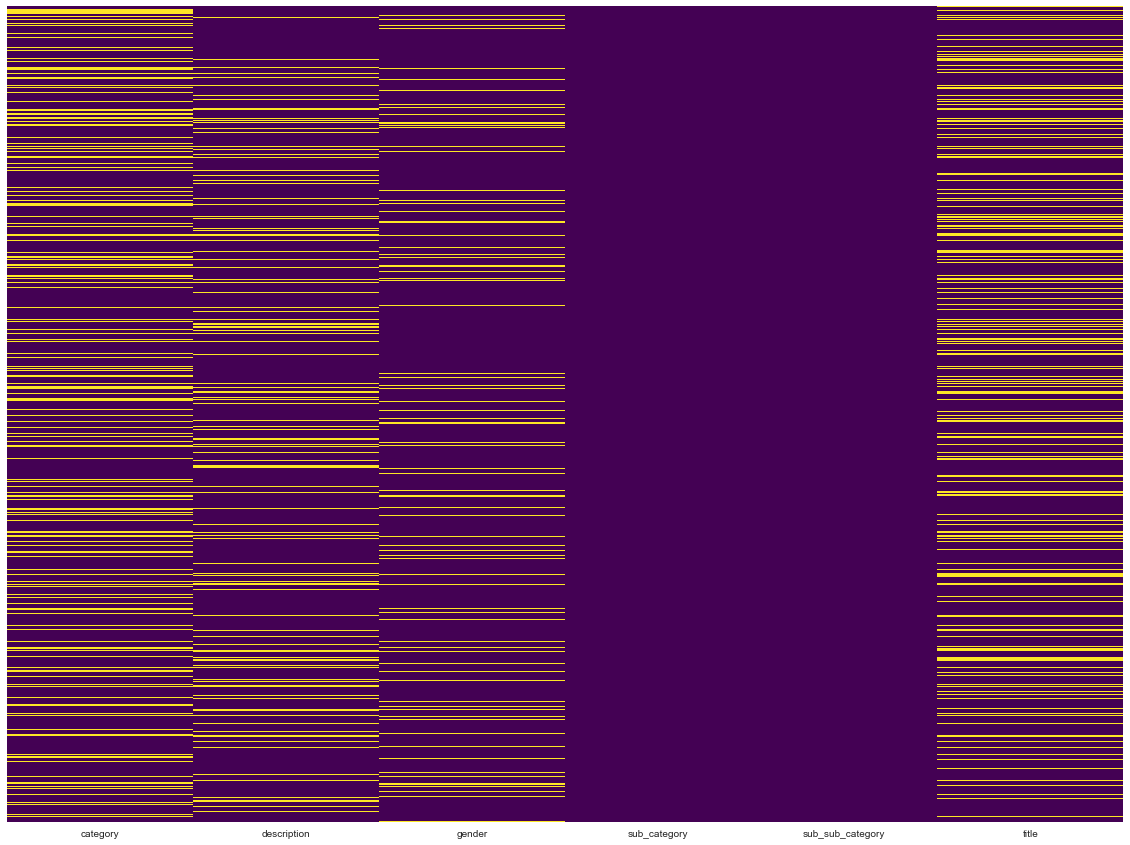

In [10]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #find null values

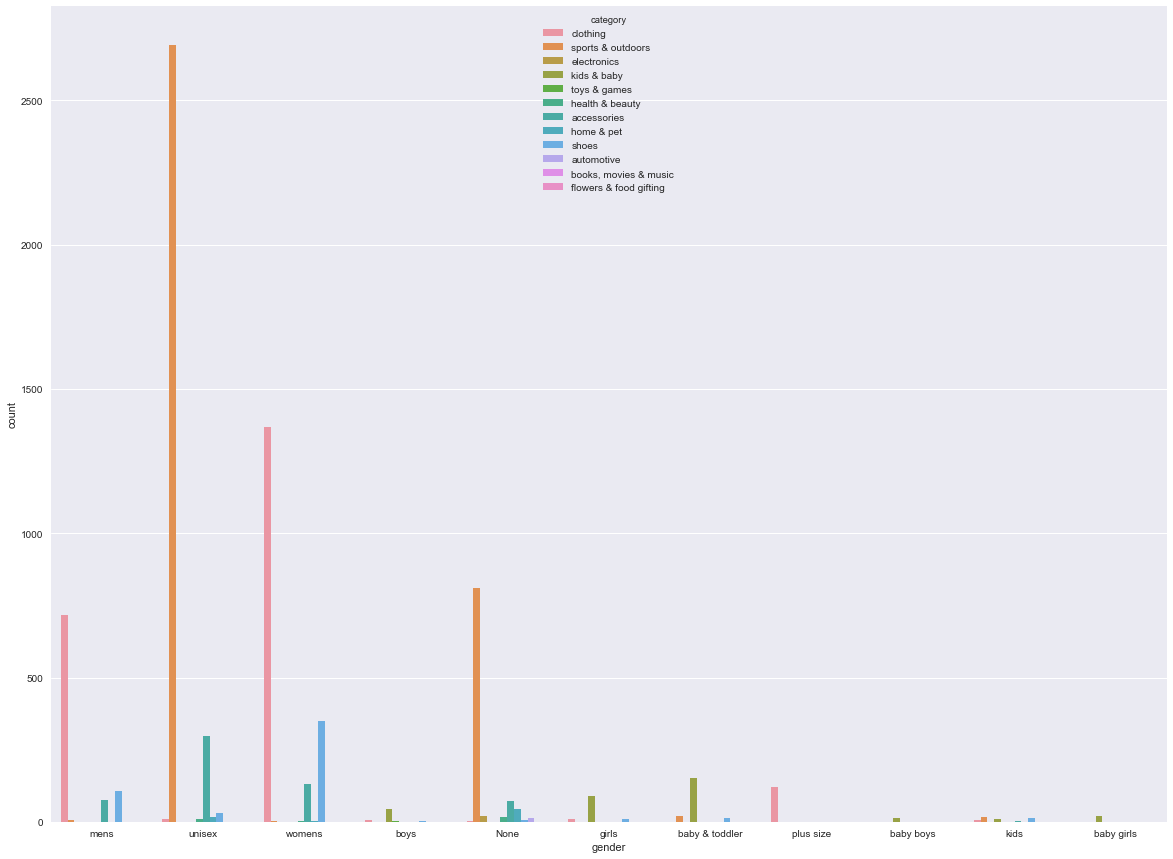

In [11]:
plt.subplots(figsize=(20,15))
sns.countplot(x='gender',hue='category',data=df)

In [12]:
df['gender'].value_counts()

unisex            3690
womens            1932
None              1789
mens               938
baby & toddler     185
plus size          122
girls              112
boys                63
kids                46
baby girls          21
baby boys           14
Name: gender, dtype: int64

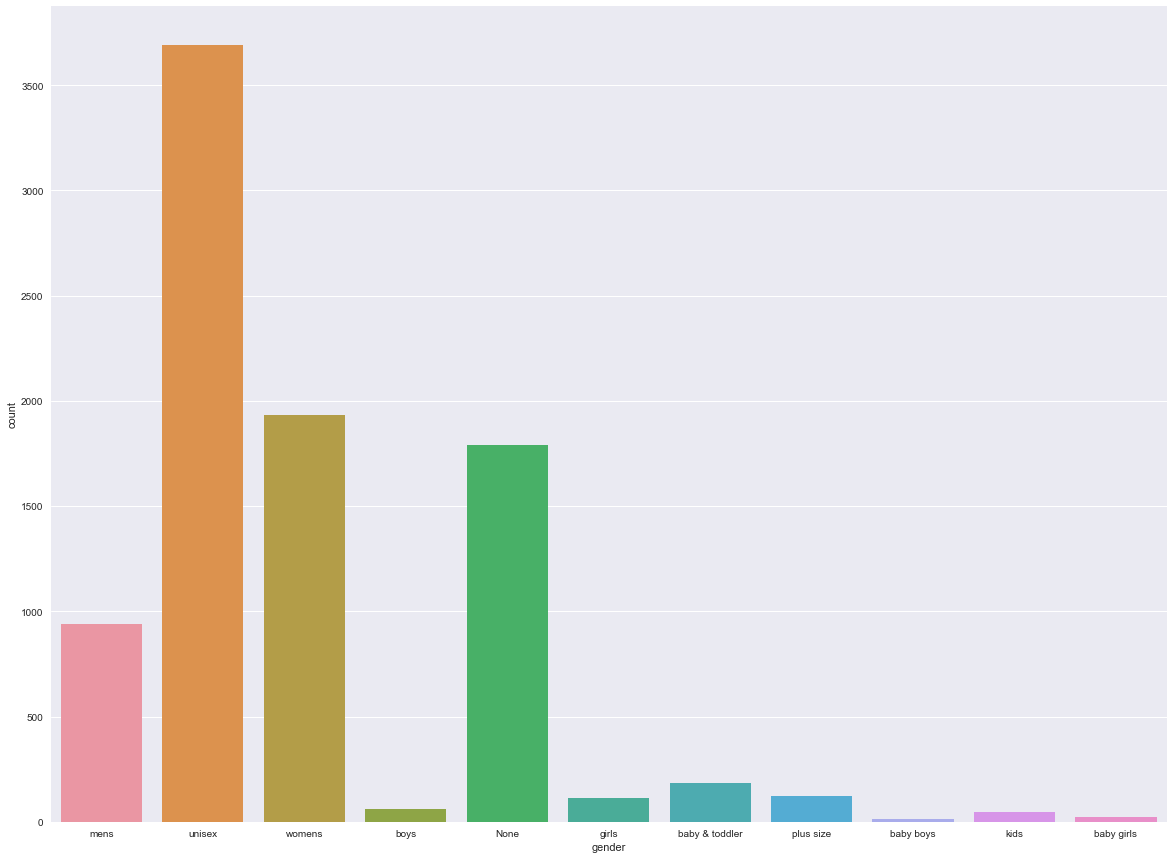

In [13]:
plt.subplots(figsize=(20,15))
sns.countplot(x='gender',data=df)

In [14]:
df[(df['gender'].isnull()==True) & (df['category'].isnull()==True)]

category                                        description gender  \
9         NaN  "Wild, but not over-the-top, the Softspots Wom...    NaN   
51        NaN                                                NaN    NaN   
62        NaN                                                NaN    NaN   
73        NaN  "Sporty knit pullover with a drawstring cowlne...    NaN   
74        NaN  "Italian-made loafers are stunningly sophistic...    NaN   
112       NaN  Take a clean, less is more approach to fashion...    NaN   
148       NaN  It's white it's bright: it's Philip Stein's 12...    NaN   
149       NaN    NuHair Hair Rejuvenation For Women - 60 tablets    NaN   
154       NaN  "Web exclusive! Unleash your cutting-edge fash...    NaN   
184       NaN  "MICHAEL Michael Kors soft venus leather messe...    NaN   
188       NaN                                                NaN    NaN   
228       NaN  "Soft fleece, Drawstring waist, 2.5"" inseam (...    NaN   
244       NaN  Seriously Soft fabric, Smooth, comfortable fee...    NaN   
263       NaN  "The lightweight Convoy Pant is highly durable...    NaN   
269       NaN           Kenra Blow-Dry Shampoo - 8.5 oz (250 ml)    NaN   
278       NaN  With a peplum hem, this crisp cotton tunic dre...    NaN   
296       NaN  "Grecian draped gown by Michael Kors. Approx. ...    NaN   
297       NaN  Get a polished, professional look with this ch...    NaN   
304       NaN  Soft & Sexy Slub, Relaxed, flattering fit, Len...    NaN   
368       NaN  Medela's PersonalFit Breastshields allow you t...    NaN   
376       NaN  Rainforest Rock Garden - Capture the mystique ...    NaN   
390       NaN  "Tuscany by Easy Street ""Conca"" slide sandal...    NaN   
423       NaN  "Simple ribbed texture dresses up this zip fro...    NaN   
443       NaN  Put the cloaking power of Mirage in the hands ...    NaN   
450       NaN  "Lively prints on silky finish for a ravishing...    NaN   
460       NaN  Whether you're the CEO of a company or a stude...    NaN   
483       NaN  "Chinoise-inspired coffee table. Wood covered ...    NaN   
484       NaN  This buttoned mock neck sweater from Van Heuse...    NaN   
592       NaN                                                NaN    NaN   
652       NaN  "MICHAEL ""Ace Stretch"" casual shoes from Mic...    NaN   
...       ...                                                ...    ...   
9084      NaN  Neiman Marcus striped woven dress shirt with s...    NaN   
9095      NaN  From PANDORA, this gorgeous sterling silver ch...    NaN   
9162      NaN  Soft hooded style accented with palm tree prin...    NaN   
9218      NaN  "Rozz dress boots by BCBGeneration deliver a c...    NaN   
9253      NaN  Mayoral jeans in stretch denim with braided fa...    NaN   
9305      NaN  Inspired by the contours of the Tetons, our Co...    NaN   
9323      NaN  "Fitflop ultra-flexible, glossy patent leather...    NaN   
9378      NaN  A trusty year-round companion just waitin to g...    NaN   
9390      NaN  Valentino suede pump, featuring grommet-studde...    NaN   
9405      NaN  "Elie Tahari ""Alva"" stretch cotton-blend dre...    NaN   
9410      NaN  Our non-iron dress shirt is crafted from pure ...    NaN   
9438      NaN  "Thakoon Addition tank. Approx. length: 20""L ...    NaN   
9519      NaN                                                NaN    NaN   
9524      NaN  "Ideal Win Big Bingo Night brings all the exci...    NaN   
9537      NaN  "Soft and dynamic cotton-blend layer with a fl...    NaN   
9553      NaN                                                NaN    NaN   
9560      NaN  "Moncler ""Fuzzy"" coverall is soft fleece wit...    NaN   
9658      NaN  This Stephen Joseph quilted backpack for presc...    NaN   
9706      NaN                                                NaN    NaN   
9716      NaN  "Featuring an elegant mix of knits, this versa...    NaN   
9754      NaN  Get a polished, professional look with this ch...    NaN   
9801      NaN  Each Max Tow Tr

In [15]:
df['category'].value_counts()

sports & outdoors         3731
clothing                  2244
accessories                579
shoes                      526
kids & baby                348
home & pet                 276
health & beauty            140
electronics                102
automotive                  46
toys & games                44
books, movies & music        7
flowers & food gifting       3
Name: category, dtype: int64

new_se = numerical value for gender

new_cat=numerical value for category

In [16]:
df.groupby(['category','sub_category','sub_sub_category']).count()
#df['category']

description  \
category          sub_category            sub_sub_category                                
accessories       None                    None                                       13   
                  belts & buckles         None                                       19   
                  eyeglasses              None                                        3   
                  gloves & mittens        None                                        0   
                                          gloves                                      4   
                  hair accessories        hair extensions                             1   
                  handbags                None                                        5   
                                          backpack handbags                           1   
                                          clutches & special occasion bags            2   
                                          crossbody bags                             25   
                                          hobo handbags                               0   
                                          satchels                                    7   
                                          shoulder handbags                           8   
                                          tote handbags                              14   
                                          wristlets                                   2   
                  hats                    None                                       18   
                                          beanies                                     1   
                  jewelry                 None                                        9   
                                          bracelets                                  21   
                                          brooches & lapels                           1   
                                          charms & pendants                           2   
                                          earrings                                   51   
                                          necklaces                                  50   
                                          rings                                      45   
                  keychains               None                                        1   
                  luggage & bags          None                                        4   
                                          backpacks                                  21   
                                          business bags                              14   
                                          luggage                                    27   
                                          sports & duffel bags                        5   
...                                                                                 ...   
sports & outdoors golf & racquet sports   golf                                       10   
                  outdoor games           skateboard                                  1   
                  team shop               None                                      169   
                                          games & outdoors activities                11   
                                          team accessories                          390   
                                          team clothing                            2729   
                                          team home & pet                           174   
                                          team kids & baby                           38   
                                          team shoes                                 60   
                  team sports             baseball & softball                         3   
                                          ice & roller hockey                         1   
toys & games      None                    None                          

In [17]:
df[(df['category'].isnull()==True)&(df['description'].isnull()==True)&(df['title'].isnull()==True)&(df['gender']=='None')]

category description gender sub_category sub_sub_category title
43        NaN         NaN   None         None             None   NaN
71        NaN         NaN   None         None             None   NaN
153       NaN         NaN   None         None             None   NaN
155       NaN         NaN   None         None             None   NaN
177       NaN         NaN   None         None             None   NaN
221       NaN         NaN   None         None             None   NaN
255       NaN         NaN   None         None             None   NaN
437       NaN         NaN   None         None             None   NaN
576       NaN         NaN   None         None             None   NaN
682       NaN         NaN   None         None             None   NaN
689       NaN         NaN   None         None             None   NaN
696       NaN         NaN   None         None             None   NaN
721       NaN         NaN   None         None             None   NaN
857       NaN         NaN   None         None             None   NaN
898       NaN         NaN   None         None             None   NaN
932       NaN         NaN   None         None             None   NaN
963       NaN         NaN   None         None             None   NaN
1072      NaN         NaN   None         None             None   NaN
1083      NaN         NaN   None         None             None   NaN
1177      NaN         NaN   None         None             None   NaN
1182      NaN         NaN   None         None             None   NaN
1186      NaN         NaN   None         None             None   NaN
1187      NaN         NaN   None         None             None   NaN
1280      NaN         NaN   None         None             None   NaN
1326      NaN         NaN   None         None             None   NaN
1368      NaN         NaN   None         None             None   NaN
1369      NaN         NaN   None         None             None   NaN
1445      NaN         NaN   None         None             None   NaN
1485      NaN         NaN   None         None             None   NaN
1670      NaN         NaN   None         None             None   NaN
...       ...         ...    ...          ...              ...   ...
8437      NaN         NaN   None         None             None   NaN
8438      NaN         NaN   None         None             None   NaN
8473      NaN         NaN   None         None             None   NaN
8514      NaN         NaN   None         None             None   NaN
8522      NaN         NaN   None         None             None   NaN
8527      NaN         NaN   None         None             None   NaN
8562      NaN         NaN   None         None             None   NaN
8570      NaN         NaN   None         None             None   NaN
8593      NaN         NaN   None         None             None   NaN
8603      NaN         NaN   None         None             None   NaN
8619      NaN         NaN   None         None             None   NaN
8717      NaN         NaN   None         None             None   NaN
8729      NaN         NaN   None         None             None   NaN
8768      NaN         NaN   None         None             None   NaN
8799      NaN         NaN   None         None             None   NaN
8885      NaN         NaN   None         None             None   NaN
8935      NaN         NaN   None         None             None   NaN
8965      NaN         NaN   None         None             None   NaN
9042      NaN         NaN   None         None             None   NaN
9111      NaN         NaN   None         None             None   NaN
9126      NaN         NaN   None         None             None   NaN
9136      NaN         NaN   None         None             None   NaN
9293      NaN         NaN   None         None             None   NaN
9341      NaN         NaN   None         None             None   NaN
9354      NaN         NaN   None         None             None   NaN
9359      NaN         NaN   None         None             None   NaN
977

In [18]:
newdf=df.ix[~((df['category'].isnull()==True)&(df['description'].isnull()==True)&(df['title'].isnull()==True)&(df['gender']=='None'))]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [19]:
newdf[(newdf['category'].isnull()==True)&(newdf['description'].isnull()==True)&(newdf['gender'].isnull()==True)&(newdf['title'].isnull()==True)]

category description gender sub_category sub_sub_category title
62        NaN         NaN    NaN         None             None   NaN
188       NaN         NaN    NaN         None             None   NaN
1551      NaN         NaN    NaN         None             None   NaN
1645      NaN         NaN    NaN         None             None   NaN
1712      NaN         NaN    NaN         None             None   NaN
2094      NaN         NaN    NaN         None             None   NaN
2134      NaN         NaN    NaN         None             None   NaN
2146      NaN         NaN    NaN         None             None   NaN
2803      NaN         NaN    NaN         None             None   NaN
2895      NaN         NaN    NaN         None             None   NaN
2915      NaN         NaN    NaN         None             None   NaN
3142      NaN         NaN    NaN         None             None   NaN
4130      NaN         NaN    NaN         None             None   NaN
4386      NaN         NaN    NaN         None             None   NaN
4511      NaN         NaN    NaN         None             None   NaN
5301      NaN         NaN    NaN         None             None   NaN
7083      NaN         NaN    NaN         None             None   NaN
7187      NaN         NaN    NaN         None             None   NaN
7253      NaN         NaN    NaN         None             None   NaN
7300      NaN         NaN    NaN         None             None   NaN
7735      NaN         NaN    NaN         None             None   NaN
7784      NaN         NaN    NaN         None             None   NaN
8630      NaN         NaN    NaN         None             None   NaN
9553      NaN         NaN    NaN         None             None   NaN
9706      NaN         NaN    NaN         None             None   NaN

In [20]:
newdf=newdf.loc[~((newdf['category'].isnull()==True)&(newdf['description'].isnull()==True)&(newdf['gender'].isnull()==True)&(newdf['title'].isnull()==True))]

In [21]:
newdf['gender'].isnull().value_counts()

False    8726
True     1063
Name: gender, dtype: int64

In [22]:
newdf[(newdf['category']=='health & beauty')&(newdf['gender'].isnull()==True)&(newdf['sub_category']=='beauty')]

category                                        description  \
334   health & beauty  butter LONDON Wink Eye Pencil, Busker - 0.04 o...   
396   health & beauty                                                NaN   
432   health & beauty  At any time of day, generously apply the stick...   
729   health & beauty  "Library of Flowers ""The Forest"" eau de parf...   
890   health & beauty  Chicken Poop Free Range Chicken Poop Lip Balm ...   
1103  health & beauty      Case sold separately. Refill includes sponge.   
1132  health & beauty  Use twice a day, morning and night. Lather bet...   
1201  health & beauty  Modern Muse Chic by Estee Lauder is a Floral W...   
1253  health & beauty  Wet n Wild Velvet Matte Lip Color, Berry Tales...   
1327  health & beauty  Launched by the design house of Dolce & Gabban...   
1366  health & beauty  The Personal Microderm combines the power of P...   
1383  health & beauty  An elegant and sensual fragrance set that cont...   
1398  health & beauty  The Zippered Carry All is available in three s...   
1420  health & beauty  Mineral Essence Retractable Brush is housed in...   
1450  health & beauty  Laura Mercier Foundation Primer Blemish-less, ...   
1560  health & beauty  lilah b. Virtuous Veil Concealer & Eye Primer ...   
1637  health & beauty                                                NaN   
1686  health & beauty                        Walgreens Sleep Mask - 1 ea   
1727  health & beauty  NARS Nail Polish, 15 mL DetailsNAIL POLISH COL...   
1729  health & beauty  A modern, semi-matte lipstick that provides fu...   
1833  health & beauty  Samba Rock & Roll Perfume by Perfumer's Worksh...   
1937  health & beauty  This tapered brush gently applies shadows over...   
2474  health & beauty  A sparkling prelude of succulent red berries a...   
3065  health & beauty  A glowing, natural radiant finish foundation w...   
3109  health & beauty  NeoStrata Resurface Foaming Glycolic Wash - 20...   
3130  health & beauty  Osmotics Blue Copper Prime Eye revitalizes tir...   
3136  health & beauty  Lancome Le Stylo Waterproof DetailsA long-wear...   
3228  health & beauty  Mineral Fusion Curl Care Hair Beauty Balm - 5 ...   
3279  health & beauty  Inspired by Laura Mercier's cult classic Cavia...   
3355  health & beauty  Tweezerman Slant Tweezer grabs hold of your ha...   
...               ...                                                ...   
6666  health & beauty  Omorovicza Limited Edition Thermal Cleansing B...   
6833  health & beauty  Redness, blemishes and other unsightly imperfe...   
6835  health & beauty  "Dry Divas Holly Jolly Bouffant Diva Shower Ca...   
7197  health & beauty  Weightless, true-to-color pigments. Adjustable...   
7407  health & beauty  To capture the warmth, fantasy, and spirit of ...   
7427  health & beauty  Circa Beauty High Definition Eye Lining Pencil...   
7646  health & beauty                                                NaN   
7829  health & beauty  A lovely paradox. A demure violet with airy bl...   
7846  health & beauty  TOM FORD Intensive Infusion Eye Treatment Deta...   
8046  health & beauty  Lierac Paris Magnificence Red Serum - Intensiv...   
8055  health & beauty  Licorice Extract helps brighten and even skin ...   
8116  health & beauty  Face Stockholm Bronzer gives lackluster comple...   
8190  health & beauty  Eye Tint is the first to market liquid tint fo...   
8214  health & beauty            BY TERRY EYE POWDER KAJAL, #1 - 0.03 oz   
8412  health & beauty  Lip gloss juiced up with 8 hours of lasting sh...   
8778  health & beauty  From Hourglass Cosmetics, a revolutionary foun...   
8827  health & beauty  Perfect sized cosmetic pouch to hold all of yo...   
8971  health & beauty  biopelle Retriderm Serum Plus (.075% Retinol) ...   
8983  health & beauty  Dermablend Intense Powder Camo seamlessly blen...   
9187  health & beauty  Your face looks noticeably fresher and more vi...   
9308  health & beauty  Black Radiance True Complexion Match M

In [23]:
newdf[(newdf['category']=='health & beauty')&(newdf['sub_sub_category']=='makeup & fragrance')&(newdf['gender'].isnull()==False)]

category                                        description  \
542   health & beauty  This must-have fingertip perfection tool from ...   
1957  health & beauty  Launched by the design house of Reem Acra in 2...   
2359  health & beauty  Bobbi Brown BRIGHTENING LIP GLOSS DetailsDesig...   
4230  health & beauty  Color glides on smoothly and blends easily for...   
4454  health & beauty  Lip gloss you can apply once and be done! Extr...   
5824  health & beauty  Bobbi Brown Long-Wear Cream Shadow Details Wha...   
6165  health & beauty         Nailtiques Hand Conditioner - 4 oz (114 g)   
6168  health & beauty  What it is: Chubby Stick fun for eyes, lips an...   
6226  health & beauty  Van Cleef & Arpels Boucheron pour Femme Eau de...   
9744  health & beauty                                                NaN   

      gender sub_category    sub_sub_category  \
542   unisex       beauty  makeup & fragrance   
1957  womens       beauty  makeup & fragrance   
2359    None       beauty  makeup & fragrance   
4230    None       beauty  makeup & fragrance   
4454    None       beauty  makeup & fragrance   
5824    None       beauty  makeup & fragrance   
6165  unisex       beauty  makeup & fragrance   
6168  womens       beauty  makeup & fragrance   
6226    None       beauty  makeup & fragrance   
9744    None       beauty  makeup & fragrance   

                                                  title  
542                  SpaRitual Cuti-Cocktail Pen Pusher  
1957    Reem Acra by Reem Acra Eau de Parfum Spray 3 oz  
2359                  Bobbi Brown BRIGHTENING LIP GLOSS  
4230  Lancome Color Design Single Sensational Effect...  
4454                            Extra Lasting Lip Gloss  
5824                 Bobbi Brown Long-Wear Cream Shadow  
6165                     ^Nailtiques Cutcl/Hand Cond 4z  
6168                        Clinique Chubby Sampler Set  
6226  Van Cleef & Arpels Boucheron pour Femme Eau de...  
9744             Stephanie Johnson Istanbul Snap Mirror

In [24]:
cond = (newdf['gender'].isnull()) & (newdf['title'].str.contains('Lip')) &(newdf['sub_category']=='beauty')
newdf.loc[cond, 'gender'] = 'womens'

In [25]:
newdf[(newdf['category'].isnull())&(newdf['sub_category']=='None')&(newdf['gender']=='None')&(newdf['title'].isnull())]

category                                        description gender  \
27        NaN  The Tarence Dress Sport Wedges by Anne Klein f...   None   
83        NaN  "Web exclusive! Slip into fabulously feminine ...   None   
103       NaN  Easy on the eyes, easy on the foot! These Easy...   None   
143       NaN  "Fantasia Slingback Sandals by Easy Street are...   None   
193       NaN  "Easy Street ""Genesis"" Casual Shoes are vers...   None   
204       NaN  "Get beautiful style and comfort with this min...   None   
253       NaN  "Web exclusive! You're sure to adore the vinta...   None   
258       NaN  "When in doubt, roll with a tried and true cla...   None   
340       NaN  Featured in Black     Style #: 855186     Full...   None   
380       NaN  Complete your sophisticated look with twill ja...   None   
393       NaN  "Complete your casual outfits wearing the go-w...   None   
439       NaN  "Web exclusive! Easy to slip on, Bella Vita ""...   None   
502       NaN  Stay ultra warm in this long, chevron quilted ...   None   
518       NaN  "The Easy Street ""Glamorous"" evening sandal ...   None   
551       NaN  "Remain stylishly cozy wearing Bare Traps ""Bo...   None   
585       NaN  Featured in pink    Girls' snow boots     Soli...   None   
595       NaN  Look crisp and collected in this short sleeve ...   None   
632       NaN  "Pleating detail on the vamp gives an edgy vib...   None   
662       NaN  "Dare to be dazzling in these Easy Street ""Vi...   None   
697       NaN  "Web exclusive! Kick your footwear collection ...   None   
707       NaN  Featured in rose     Stretch side waist     St...   None   
713       NaN  "Easy Street ""Origin"" Clogs are the perfect ...   None   
767       NaN  Rendered with a classic wash and straight-leg ...   None   
801       NaN  Featured in admiral multi     Top sold separat...   None   
858       NaN  Nylon     Boyshort style     Helanca pattern l...   None   
894       NaN  "Web exclusive! With the ""Lucky"" oxfords fro...   None   
901       NaN  "Web exclusive! Step out the door in casually ...   None   
988       NaN  Featured in tan     Push up style bra     Logo...   None   
1027      NaN  Hidden light control panel targets tummy area ...   None   
1051      NaN  "Web exclusive! With ""Cecilia"" Mary Jane pum...   None   
...       ...                                                ...    ...   
9288      NaN  Unique stretch along the edge of the cups     ...   None   
9314      NaN  This vibrant plaid big and tall button-down sh...   None   
9344      NaN  Made from an ultra-soft cotton blend, this com...   None   
9446      NaN  "Skechers creates a shoe fit for any event wit...   None   
9480      NaN  "This ""Grill Seeker"" graphic tee from Tommy ...   None   
9501      NaN  Jumping out of bed and into the scrumptious so...   None   
9512      NaN  "For busy days on-the-go, wear Easy Street ""F...   None   
9516      NaN  "Web exclusive! You'll adore how comfortable a...   None   
9518      NaN  Relaxed fit offers extra comfort from the firs...   None   
9527      NaN  "Ariel Slingback Sandals by Easy Street are su...   None   
9540      NaN  "Web exclusive! Web exclusive! Pretty meets pr...   None   
9562      NaN  "Work the room in classy confidence wearing Ea...   None   
9586      NaN  Dress your baby boy in luxuriously warm comfor...   None   
9595      NaN  With a tonal logo accent at the toe and a comf...   None   
9607      NaN  Featuring ultra-cozy French terry construction...   None   
9632      NaN  "Keep warm this winter with these faux fur boo...   None   
9635      NaN  Get complete coverage and comfort with these s...   None   
9650      NaN  "Web exclusive! Take on every shift in comfort...   None   
9659      NaN  "Web exclusive! Embrace your trend-setting sid...   None   
9679      NaN  "Bring some serious vamp to your silhouette wi...   None   
9699      NaN  "A preppy take on a casual essential, this com...   None   
9705      NaN  "Web exclusive!

In [27]:
newdf[newdf['description'].str.contains('Web')==True][['description','category']]

description           category
41    "Web exclusive! Decorate the walls in your hom...         home & pet
78    "Web exclusive! Relax in style in Bella Vita "...              shoes
83    "Web exclusive! Slip into fabulously feminine ...                NaN
114   Web exclusive! Conquer gift giving with a pers...         home & pet
145   "Web exclusive! Azura Women's ""Showtime"" Wed...              shoes
154   "Web exclusive! Unleash your cutting-edge fash...                NaN
253   "Web exclusive! You're sure to adore the vinta...                NaN
276   "Web exclusive! Update all the beds in your ho...         home & pet
291   Web exclusive! Tweens are ready for adventure ...                NaN
295   "Web exclusive! Show unwelcome visitors out of...         home & pet
348   "Web exclusive! Step out in confidence and fli...                NaN
352   "Web exclusive! Add some bite to your summer o...                NaN
439   "Web exclusive! Easy to slip on, Bella Vita ""...                NaN
465   "Web exclusive! Wanted ""Cavalier"" tall boots...                NaN
519   "Web exclusive! Dazzle and delight onlookers i...                NaN
577   "Web exclusive! Put your most stylish foot for...                NaN
697   "Web exclusive! Kick your footwear collection ...                NaN
703   "Web exclusive! Put a fresh spin on gardening ...         home & pet
779   "Web exclusive! Jam-packed with kicks, punches...         home & pet
894   "Web exclusive! With the ""Lucky"" oxfords fro...                NaN
901   "Web exclusive! Step out the door in casually ...                NaN
945   "Web exclusive! Be your unique and elegant sel...                NaN
1051  "Web exclusive! With ""Cecilia"" Mary Jane pum...                NaN
1073  "Web exclusive! Tackle your to-do list in time...                NaN
1091  "Web exclusive! Enjoy sleek, casual style and ...                NaN
1110  "Web exclusive! Hold your team passion close t...        accessories
1118  "Web exclusive! This official NFL ticket and c...  sports & outdoors
1137  "Web exclusive! Punch the clock in style with ...                NaN
1160  "Web exclusive! Stride with class and elegance...                NaN
1264  "Web exclusive! Make an edgy fashion statement...                NaN
...                                                 ...                ...
8263  "Web exclusive! This official NFL ticket and c...  sports & outdoors
8343  "Web exclusive! Casual comfort and chic style ...              shoes
8411  Web exclusive! Spin a sexy look with a Marvel ...                NaN
8430  "Web exclusive! Put an original spin on the cl...         home & pet
8482  "Web exclusive! Challenge fellow competitors w...                NaN
8505  "Web exclusive! Put a spring in your step with...                NaN
8518  "Web exclusive! Stay cozy with a True North by...         home & pet
8608  "Web exclusive! No sports collection really st...  sports & outdoors
8644  "Web exclusive! Put your most stylish foot for...                NaN
8740  "Web exclusive! Anchor your look in classic st...                NaN
8744  Web exclusive! Add a breath of fresh air to yo...              shoes
8772  "Web exclusive! A Tequila Sunrise 3-bowl serve...         home & pet
8875  "Web exclusive! Wear these Marenda slip-ons fr...                NaN
8933  "Web exclusive! Cold weather is no match for C...                NaN
9078  "Web exclusive! You're sure to adore the vinta...                NaN
9098  "Web exclusive! Kick your footwear collection ...                NaN
9268  "Web exclusive! From the office to downtown, S...                NaN
9322  "Web exclusive! Easy Street ""Giver"" slip-ons...                NaN
9367  "Web exclusive! A must for every baby's nurser...        kids & baby
9516  "Web exclusive! You'll adore how comfortable a...                NaN
9540  "Web exclusive! Web exclusive! Pretty meets pr...                NaN
9614  "Web exclusive! Comfort and style seamlessly c...              

In [28]:
cond = (newdf['category'].isnull()) & ((newdf['description'].str.contains('foot')) |(newdf['description'].str.contains('feet')))
newdf.loc[cond, 'category'] = 'shoes'

In [29]:
pd.set_option('display.max_colwidth', -1)
newdf[(newdf['category'].isnull()==False)&(newdf['sub_category']=='None')&(newdf['gender'].isnull())&(newdf['title'].isnull())]

category  \
154   shoes          
1722  shoes          
1779  shoes          
4119  shoes          
4396  shoes          
4859  shoes          
4965  shoes          
5608  toys & games   
5929  shoes          
5992  shoes          
6018  shoes          
6229  shoes          
6494  shoes          
6508  shoes          
8350  shoes          
8411  shoes          
8933  shoes          
9862  shoes          
9934  toys & games   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  \
154   "Web exclusive! Unleash your cutting-edge fashion sense with Bella Vita Ramona booties. The attractive cut-out sides give your feet plenty of room to breathe while the buckle closures make for easy fitting and can be adjusted to your liking. Ramona booties also boast a moderate heel for just the right height and a foam padded insole for extra support, so you can stride confidently and comfortably.    Featured in black     Heel: 1.5"" heel     Shaft circumference: 11.19""     Shaft height: 4.72""     Back zipper     Cut-out sides     Gored buckle strap detail     Foam padded insole     Microsuede lining     Leather upper     TPR bottom     Imported"                                                                                                                                      
1722  "Dress to seriously impress with a pair of women's Nine West ""Hannley"" leather-look pumps, featuring a dramatically tall stiletto heel and an adjustable crisscross ankle strap for a secure fit.     Featured in black     3.5"" heel     Adjustable ankle strap     Padded foot-bed     Faux leather upper     Imported"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1779  "Streamline your look with these over the knee leather boots from Nine West. The front is minimalist and smooth, while the back features a notched V top cutout and eye-catching lace-up details.    Featured in black     Approx. 1"" heel     18.8"" shaft height     15.25"" calf/shaft circumference     Closed round toe     Closed back with plunging V-notch and lace-up details with metal eyelets     Pull-on style     Padded footbed     Leather upper     Imported"                                                                                                                                                                                                                                                                                                                                       
4119  "Build your wardrobe with timeless Aerosoles ""Good Lux"" Peep-Toe Pumps. Classy for business meetings or social occasions, these elegant women's shoes have stacked heels, open toes and are tastefully embellished with chain links. Designed to distribute weight away from the ball of your foot, this fashionable pump offers superior comfort when you walk or stand.    Featured

In [30]:
cond = (newdf['gender'].isnull()) & (newdf['description'].str.contains('women',flags=re.IGNORECASE)) &(newdf['category']=='shoes')
newdf.loc[cond, 'gender'] = 'womens'

In [31]:
newdf[(newdf['category']=='shoes')&(newdf['gender'].isnull()==False)&(newdf['title'].isnull()==False)]

category  \
9     shoes     
113   shoes     
146   shoes     
277   shoes     
289   shoes     
310   shoes     
313   shoes     
339   shoes     
347   shoes     
361   shoes     
408   shoes     
421   shoes     
422   shoes     
488   shoes     
489   shoes     
494   shoes     
508   shoes     
532   shoes     
555   shoes     
569   shoes     
571   shoes     
612   shoes     
621   shoes     
673   shoes     
676   shoes     
694   shoes     
706   shoes     
759   shoes     
821   shoes     
853   shoes     
...     ...     
9443  shoes     
9449  shoes     
9472  shoes     
9478  shoes     
9479  shoes     
9504  shoes     
9520  shoes     
9539  shoes     
9542  shoes     
9547  shoes     
9565  shoes     
9572  shoes     
9612  shoes     
9616  shoes     
9623  shoes     
9640  shoes     
9729  shoes     
9751  shoes     
9757  shoes     
9769  shoes     
9785  shoes     
9814  shoes     
9823  shoes     
9881  shoes     
9903  shoes     
9931  shoes     
9932  shoes     
9944  shoes     
9972  shoes     
9978  shoes     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description  \
9     "Wild, but not over-the-top, the Softspots Women's ""Scarlet"" Casual Slip-on Shoes sass up any outfit. These versatile shoes feature leopard-patterned elastic gore straps on the upper, as well as a low stacked heel and a brushed cotton lining for all-day comfort.    Featured in black with leopard elastic    1.5"" heel    Elastic gore straps    Tailored stacked heel look     Exclusive Pillowtop footbed    Brushed cotton lining    Nappa leather    Imported"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
113   Comfy boots in pebbled suede with convenient pull tab  Italian calf leather upper   Side zip closure  Leather lining and sole  Padded insole  Made in Italy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [32]:
newdf[(newdf['category'].isnull()==False)&(newdf['gender']=='None')&(newdf['sub_category']=='team shop')]

category  \
14    sports & outdoors   
21    sports & outdoors   
26    sports & outdoors   
46    sports & outdoors   
67    sports & outdoors   
75    sports & outdoors   
93    sports & outdoors   
101   sports & outdoors   
107   sports & outdoors   
108   sports & outdoors   
110   sports & outdoors   
111   sports & outdoors   
120   sports & outdoors   
128   sports & outdoors   
138   sports & outdoors   
144   sports & outdoors   
187   sports & outdoors   
191   sports & outdoors   
192   sports & outdoors   
196   sports & outdoors   
208   sports & outdoors   
209   sports & outdoors   
215   sports & outdoors   
222   sports & outdoors   
223   sports & outdoors   
245   sports & outdoors   
251   sports & outdoors   
252   sports & outdoors   
256   sports & outdoors   
270   sports & outdoors   
...                 ...   
9633  sports & outdoors   
9672  sports & outdoors   
9674  sports & outdoors   
9682  sports & outdoors   
9689  sports & outdoors   
9697  sports & outdoors   
9704  sports & outdoors   
9707  sports & outdoors   
9735  sports & outdoors   
9737  sports & outdoors   
9745  sports & outdoors   
9746  sports & outdoors   
9763  sports & outdoors   
9811  sports & outdoors   
9819  sports & outdoors   
9858  sports & outdoors   
9869  sports & outdoors   
9879  sports & outdoors   
9883  sports & outdoors   
9901  sports & outdoors   
9905  sports & outdoors   
9953  sports & outdoors   
9963  sports & outdoors   
9966  sports & outdoors   
9975  sports & outdoors   
9983  sports & outdoors   
9986  sports & outdoors   
9991  sports & outdoors   
9996  sports & outdoors   
9998  sports & outdoors   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  \
14    There's no better way to embrace your fandom for the Tampa Bay Buccaneers than with this Salute To Service Sideline Low Profile 59FIFTY fitted hat from New Era!    100% of the NFL's proceeds from Salute to Service products are donated to three non-profit organizations (USO, Pat Tillman Foundation and Wounded Warrior Project). For further information, please visit www.nfl.com/salute                                                                                                                                                                     
21    Get the perfect look to let everyone know you are a stylish UTEP Miners fan! With eye-catching team graphics, this Personalized Football hoodie will show everyone that you know how to display your team spirit in style. It features team graphics and the name and number of your choice. With a comfy hoodie and that classic look you love, you'll be ready to head anywhere and know that you look your best.                                                                                                                                                  
26    Get your head in the game with this St. Louis Cardinals Country Colors Redux 59FIFTY fitted hat from New Era! The embroidered St. Louis Cardinals graphics will put your die-hard fandom on notice. No one will mistake your enthusiastic St. Louis Cardinals pride when you don this spirited cap!                                                                                                                                                                                                                                                                  
46    NaN                                                                                                           

In [33]:
cond = (newdf['category'].isnull()==False)&(newdf['gender']=='None')&(newdf['sub_category']=='team shop')
newdf.loc[cond, 'gender'] = 'unisex'

In [34]:
newdf[(newdf['category'].isnull())&(newdf['title'].str.contains('Sleeve'))]

category  \
68    NaN       
147   NaN       
171   NaN       
176   NaN       
382   NaN       
539   NaN       
566   NaN       
709   NaN       
867   NaN       
1127  NaN       
1156  NaN       
1287  NaN       
1307  NaN       
1675  NaN       
1726  NaN       
1930  NaN       
1975  NaN       
2006  NaN       
2143  NaN       
2306  NaN       
2307  NaN       
2417  NaN       
2455  NaN       
2643  NaN       
2842  NaN       
3168  NaN       
3171  NaN       
3175  NaN       
3251  NaN       
3321  NaN       
...   ...       
6894  NaN       
7241  NaN       
7242  NaN       
7316  NaN       
7337  NaN       
7489  NaN       
7573  NaN       
7789  NaN       
7913  NaN       
7966  NaN       
8032  NaN       
8057  NaN       
8233  NaN       
8238  NaN       
8301  NaN       
8648  NaN       
8651  NaN       
8664  NaN       
9010  NaN       
9118  NaN       
9163  NaN       
9378  NaN       
9405  NaN       
9489  NaN       
9508  NaN       
9619  NaN       
9771  NaN       
9930  NaN       
9961  NaN       
9988  NaN       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      description  \
68    "Aidan Mattox floral jacquard gown. Approx. length: 56""L from shoulder to hem, 53""L down center back. Bateau neckline; V'd back. Sleeveless; moderate shoulder coverage. Mermaid silhouette. Straight hem. Hidden side zip. Polyester/metallic. Lining, polyester/spandex. Dry clean. Imported of French material."                                                                                                                                                                                                                                                                                                                                                                                         
147   Show your Jimmie Johnson pride every time you wear this Finish Line T-shirt. Featuring Jimmie Johnson graphics, this tee will keep you comfortable and full of team spirit.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
171   "Imoga ""Scarlet"" sweater combo dress. Round neckline. Long raglan sleeves. Eyelash sweater bodice. Dropped waist. Shift silhouette. Printed skirt. Straight hem. Pullover style. Sweater: nylon; skirt: polyester. Imported."                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
176   ERIN erin fetherston cocktail dress in ponte. V neckline and back. Sleeveless; tapered straps. Paneled bodice. Pleated waist. Fit-and-flare silhouette. Hidden back zip. Ray

In [35]:
newdf[(newdf['category'].isnull())&(newdf['gender']=='None')]

category  \
27    NaN       
35    NaN       
53    NaN       
54    NaN       
56    NaN       
63    NaN       
64    NaN       
80    NaN       
83    NaN       
91    NaN       
96    NaN       
98    NaN       
143   NaN       
171   NaN       
176   NaN       
193   NaN       
203   NaN       
204   NaN       
230   NaN       
253   NaN       
258   NaN       
274   NaN       
309   NaN       
340   NaN       
352   NaN       
365   NaN       
375   NaN       
380   NaN       
393   NaN       
401   NaN       
...   ...       
9518  NaN       
9527  NaN       
9540  NaN       
9562  NaN       
9577  NaN       
9585  NaN       
9586  NaN       
9594  NaN       
9595  NaN       
9607  NaN       
9619  NaN       
9632  NaN       
9635  NaN       
9650  NaN       
9664  NaN       
9699  NaN       
9738  NaN       
9762  NaN       
9791  NaN       
9798  NaN       
9808  NaN       
9809  NaN       
9844  NaN       
9897  NaN       
9904  NaN       
9927  NaN       
9930  NaN       
9939  NaN       
9971  NaN       
9984  NaN       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                description  \
27    The Tarence Dress Sport Wedges by Anne Klein feature an elasticized criss-cross vamp design.     Featured in black     Dress sport wedge     3.15'' heel height     Round closed toe     AK Sport logo at back counter     Matte stretch upper with elasticized criss-cross topline/instep     Cushioning for comfort     Matte stretch / patent PU /elastic upper                                                               

In [36]:
cond = (newdf['category'].isnull())&(newdf['gender']=='None')&((newdf['title'].str.contains('Shirt'))|(newdf['title'].str.contains('Dress'))|(newdf['title'].str.contains('Sleeve')))
newdf.loc[cond, 'category'] = 'clothing'

In [37]:
cond = (newdf['category'].isnull())&(newdf['gender']=='None')&(newdf['title'].str.contains('Speakers'))
newdf.loc[cond, 'category'] = 'electronics'

In [38]:
newdf[(newdf['category']=='health & beauty')&(newdf['sub_category']=='beauty')]

category  \
334   health & beauty   
396   health & beauty   
432   health & beauty   
542   health & beauty   
729   health & beauty   
890   health & beauty   
1103  health & beauty   
1132  health & beauty   
1201  health & beauty   
1253  health & beauty   
1327  health & beauty   
1366  health & beauty   
1383  health & beauty   
1398  health & beauty   
1420  health & beauty   
1450  health & beauty   
1560  health & beauty   
1637  health & beauty   
1686  health & beauty   
1727  health & beauty   
1729  health & beauty   
1833  health & beauty   
1937  health & beauty   
1957  health & beauty   
2359  health & beauty   
2371  health & beauty   
2474  health & beauty   
3065  health & beauty   
3109  health & beauty   
3130  health & beauty   
...               ...   
6835  health & beauty   
7197  health & beauty   
7407  health & beauty   
7427  health & beauty   
7646  health & beauty   
7829  health & beauty   
7846  health & beauty   
8046  health & beauty   
8055  health & beauty   
8116  health & beauty   
8190  health & beauty   
8214  health & beauty   
8250  health & beauty   
8412  health & beauty   
8778  health & beauty   
8827  health & beauty   
8971  health & beauty   
8983  health & beauty   
9187  health & beauty   
9308  health & beauty   
9348  health & beauty   
9521  health & beauty   
9543  health & beauty   
9564  health & beauty   
9593  health & beauty   
9622  health & beauty   
9649  health & beauty   
9744  health & beauty   
9851  health & beauty   
9959  health & beauty   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                description  \
334   butter LONDON Wink Eye Pencil, Busker - 0.04 oz (1.18 ml)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
396   NaN                                                                                                                       

In [39]:
newdf['category'].value_counts()
newdf['gender'].value_counts()
#newdf['gender'].value_counts()

unisex            4493
womens            1950
mens              938 
None              800 
baby & toddler    185 
plus size         122 
girls             112 
boys              63  
kids              46  
baby girls        21  
baby boys         14  
Name: gender, dtype: int64

In [40]:
cond = (newdf['sub_category']=='health care')&((newdf['gender'].isnull())|(newdf['gender']=='None'))
newdf.loc[cond, 'gender'] = 'unisex'
#

In [41]:
newdf[(newdf['sub_category']=='health care')]

category  \
29    health & beauty   
763   health & beauty   
889   health & beauty   
999   health & beauty   
3036  health & beauty   
3539  health & beauty   
4097  health & beauty   
5057  health & beauty   
5580  health & beauty   
7250  health & beauty   
7463  health & beauty   
7592  health & beauty   
7691  health & beauty   
7875  health & beauty   
7969  health & beauty   
8452  health & beauty   
8627  health & beauty   
9086  health & beauty   
9602  health & beauty   
9608  health & beauty   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  description  \
29    Sage Solutions Herbal Supplement. Wisdom You Can Swallow!  Only the finest hand-selected Chinese herbs are used with attention to the highest quality at each stage of production.   These statements have not been evaluated by the Food and Drug Administration (FDA). These products are not meant to diagnose treat or cure any disease or medical condition. Please consult your doctor before starting any exercise or nutritional supplement program or before using these or any product during pregnancy or if you have a serious medical condi

In [42]:
cond = (newdf['category']=='health & beauty')&(newdf['gender'].isnull())
newdf.loc[cond, 'gender'] = 'womens'



In [43]:
cond = (newdf['category']=='electronics')&((newdf['gender'].isnull())|(newdf['gender']=='None'))
newdf.loc[cond, 'gender'] = 'unisex'

In [44]:
newdf[newdf['category']=='electronics']

category  \
4     electronics   
124   electronics   
264   electronics   
286   electronics   
369   electronics   
370   electronics   
415   electronics   
723   electronics   
740   electronics   
791   electronics   
795   electronics   
841   electronics   
1071  electronics   
1412  electronics   
1425  electronics   
1444  electronics   
1462  electronics   
1481  electronics   
1531  electronics   
1573  electronics   
1615  electronics   
1893  electronics   
1919  electronics   
2073  electronics   
2175  electronics   
2222  electronics   
2380  electronics   
2396  electronics   
2501  electronics   
2530  electronics   
...           ...   
7211  electronics   
7256  electronics   
7305  electronics   
7378  electronics   
7389  electronics   
7542  electronics   
7563  electronics   
7571  electronics   
7805  electronics   
7972  electronics   
7994  electronics   
8006  electronics   
8081  electronics   
8227  electronics   
8376  electronics   
8436  electronics   
8661  electronics   
8702  electronics   
8710  electronics   
8756  electronics   
8839  electronics   
8894  electronics   
8910  electronics   
8944  electronics   
9031  electronics   
9272  electronics   
9398  electronics   
9471  electronics   
9817  electronics   
9927  electronics   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        description  \
4     Ballistix Sport LT 16GB (2 x 8GB) 288-Pin DDR4 SDRAM DDR4 2400 (PC4 19200) Memory Model BLS2K8G4D240FSB                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
124   Axiom - DDR3L - 32 GB - LRDIMM 240-pin - 1600 MHz / PC3L-12800 - CL11 - 1.35 V - Load-Reduced - ECC                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [45]:
newdf['category'].value_counts()
#(newdf['gender']=='None')&

sports & outdoors         3731
clothing                  2319
shoes                     721 
accessories               579 
kids & baby               348 
home & pet                276 
health & beauty           140 
electronics               103 
automotive                46  
toys & games              44  
books, movies & music     7   
flowers & food gifting    3   
Name: category, dtype: int64

In [46]:
cond = (newdf['category']=='automotive')&(newdf['gender'].isnull())
newdf.loc[cond, 'gender'] = 'unisex'


In [47]:
cond = (newdf['category']=='toys & games')&(newdf['gender'].isnull())&((newdf['sub_category']=='dolls & stuffed animals')|(newdf['sub_category']=='musical instruments'))
newdf.loc[cond, 'gender'] = 'kids'

In [48]:
cond = (newdf['category']=='toys & games')&(newdf['gender'].isnull())&((newdf['sub_category']=='games & puzzles')|(newdf['sub_category']=='building blocks & sets')|(newdf['sub_category']=='costumes & accessories'))
newdf.loc[cond, 'gender'] = 'boys'

In [49]:
cond = (newdf['category']=='toys & games')&(newdf['gender'].isnull())&(newdf['sub_category']=='pretend play & dress up')
newdf.loc[cond, 'gender'] = 'girls'

In [50]:
cond = (newdf['category']=='toys & games')&(newdf['gender'].isnull())&(newdf['description'].str.contains('child',flags=re.IGNORECASE)|newdf['title'].str.contains('kids',flags=re.IGNORECASE))
newdf.loc[cond, 'gender'] = 'kids'

In [51]:
cond = (newdf['category']=='toys & games')&(newdf['gender'].isnull())&((newdf['sub_category']=='None')|(newdf['sub_category']=='baby toys'))
newdf.loc[cond, 'gender'] = 'baby & toddler'

In [52]:
cond = (newdf['category']=='home & pet')&(newdf['gender'].isnull()|(newdf['gender']=='None'))
newdf.loc[cond, 'gender'] = 'unisex'

In [53]:
cond = (newdf['category']=='kids & baby')&(newdf['gender'].isnull())
newdf.loc[cond, 'gender'] = 'baby & toddler'

In [54]:
cond = (newdf['category']=='shoes')&(newdf['gender'].isnull())
newdf.loc[cond, 'gender'] = 'womens'

In [55]:
cond = (newdf['category']=='flowers & food gifting')&(newdf['gender'].isnull())
newdf.loc[cond, 'gender'] = 'unisex'

In [56]:
cond = (newdf['category']=='sports & outdoors')&(newdf['gender'].isnull())
newdf.loc[cond, 'gender'] = 'unisex'

In [57]:
cond = (newdf['category']=='books, movies & music')&(newdf['gender'].isnull())
newdf.loc[cond, 'gender'] = 'unisex'

In [58]:
cond = (newdf['category'].isnull())&(newdf['gender'].isnull())&(newdf['title'].str.contains('women',flags=re.IGNORECASE))
newdf.loc[cond, 'gender'] = 'womens'

#df[(df['category'].isnull())&(df['gender'].isnull())&(df['title'].str.contains('women',flags=re.IGNORECASE))]

In [59]:
cond = (newdf['category'].isnull())&(newdf['gender'].isnull())&(newdf['title'].str.contains('men',flags=re.IGNORECASE))
newdf.loc[cond, 'gender'] = 'mens'

#newdf[(newdf['category'].isnull())&(newdf['gender'].isnull())&(newdf['title'].str.contains('men',flags=re.IGNORECASE))]

In [60]:
cond = (newdf['category'].isnull())&(newdf['gender'].isnull())&(newdf['description'].str.contains('women',flags=re.IGNORECASE))
newdf.loc[cond, 'gender'] = 'womens'
#newdf[(newdf['category'].isnull())&(newdf['gender'].isnull())&(newdf['description'].str.contains('women',flags=re.IGNORECASE))]

In [61]:
cond = (newdf['category'].isnull())&(newdf['gender'].isnull())&(newdf['description'].str.contains('skirt',flags=re.IGNORECASE))
newdf.loc[cond, 'gender'] = 'womens'

In [62]:
#newdf[(newdf['category']=='flowers & food gifting')]
#newdf[(newdf['category']=='clothing')&(newdf['gender'].isnull())]
#newdf[(newdf['category']=='shoes')&(newdf['gender'].isnull())]
#newdf[(newdf['category']=='kids & baby')&(newdf['gender'].isnull())]
#newdf[(newdf['category']=='home & pet')&(newdf['gender'].isnull())]
#newdf[(newdf['category']=='toys & games')&(newdf['gender'].isnull())]
#newdf[(newdf['category']=='electronics')]
#newdf[(newdf['category']=='automotive')]
#newdf[(newdf['category']=='health & beauty')]
#newdf[(newdf['category']=='accessories')]
#newdf[(newdf['category']=='sports & outdoors')&(newdf['gender'].isnull())]
#newdf[(newdf['category']=='books, movies & music')&(newdf['gender'].isnull()==False)]


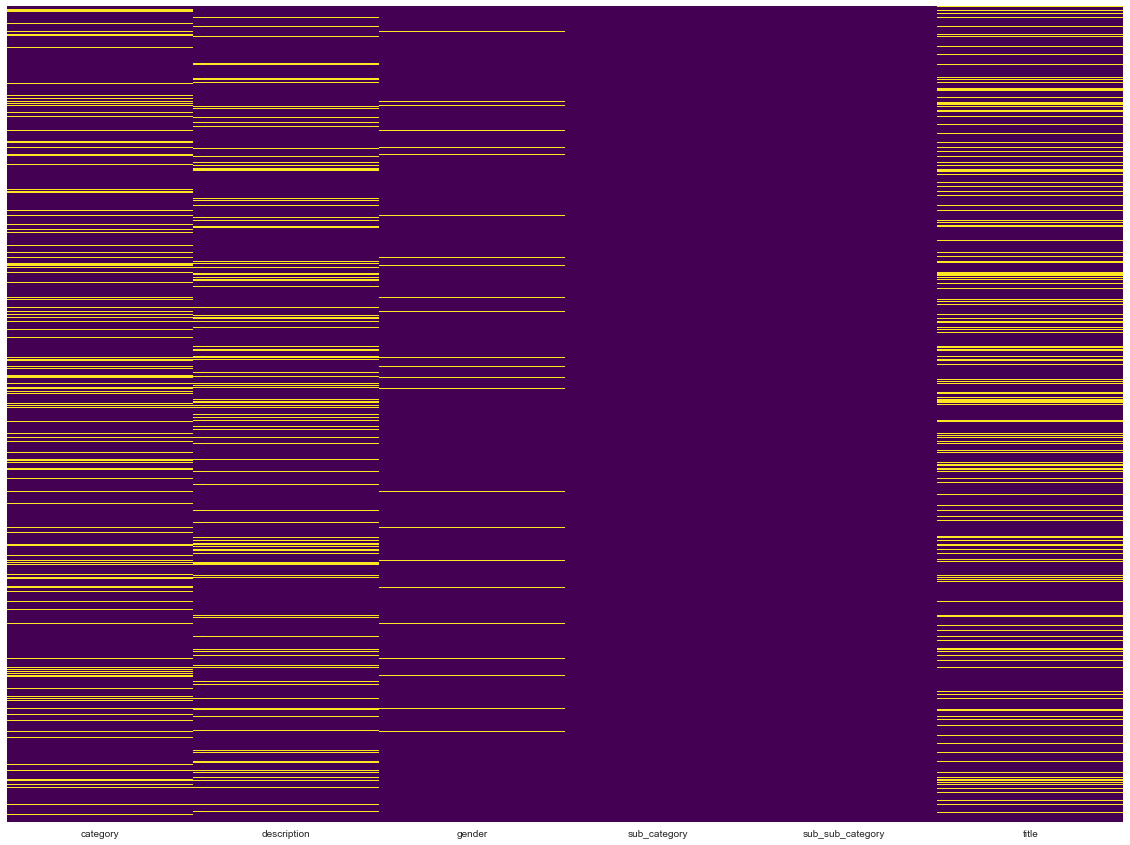

In [63]:
plt.subplots(figsize=(20,15))
sns.heatmap(newdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [64]:
newdf[(newdf['category'].isnull())&(newdf['gender'].isnull())]

category  \
51    NaN       
73    NaN       
74    NaN       
112   NaN       
148   NaN       
184   NaN       
228   NaN       
244   NaN       
263   NaN       
269   NaN       
278   NaN       
296   NaN       
297   NaN       
304   NaN       
368   NaN       
423   NaN       
443   NaN       
450   NaN       
460   NaN       
484   NaN       
592   NaN       
652   NaN       
744   NaN       
815   NaN       
827   NaN       
833   NaN       
834   NaN       
845   NaN       
851   NaN       
952   NaN       
...   ...       
8893  NaN       
8958  NaN       
8998  NaN       
9037  NaN       
9073  NaN       
9084  NaN       
9095  NaN       
9162  NaN       
9218  NaN       
9253  NaN       
9305  NaN       
9378  NaN       
9390  NaN       
9405  NaN       
9410  NaN       
9438  NaN       
9519  NaN       
9524  NaN       
9537  NaN       
9560  NaN       
9658  NaN       
9716  NaN       
9754  NaN       
9801  NaN       
9821  NaN       
9850  NaN       
9885  NaN       
9907  NaN       
9936  NaN       
9937  NaN       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description  \
51    NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
73    "Sporty knit pullover with a drawstring cowlneck   Drawstring cowlneck   Button-tab roll sleeves   Kangaroo pocket   About 28"" from shoulder to hem   Cotton/polyester   Machine wash   Imported"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [65]:
train=newdf

In [66]:
train['category']=train['category'].astype('category')
train['new_category']=train['category'].cat.codes

In [67]:
train['sub_category']=train['sub_category'].astype('category')
train['new_sub_category']=train['sub_category'].cat.codes

In [68]:
train['sub_sub_category']=train['sub_sub_category'].astype('category')
train['new_sub_sub_category']=train['sub_sub_category'].cat.codes

In [69]:
train['gender']=train['gender'].astype('category')
train['new_gender']=train['gender'].cat.codes

In [70]:
train.drop(['description','title','gender','category','sub_category','sub_sub_category'],axis=1)

new_category  new_sub_category  new_sub_sub_category  new_gender
0     3             86                0                     7         
1     10            84                177                   9         
2     10            84                177                   9         
3     3             81                0                     10        
4     4             19                118                   9         
5     10            84                177                   9         
6     10            84                177                   9         
7     10            84                177                   9         
8     3             59                0                     10        
9     9             0                 0                     10        
10    3             86                174                   7         
11    3             1                 4                     10        
12    8             13                31                    4         
13    3             73                0                     10        
14    10            84                176                   9         
15    11            0                 0                     6         
16    10            84                178                   9         
17   -1             0                 0                     9         
18    10            84                177                   9         
19    3             72                0                     7         
20    10            84                177                   9         
21    10            84                177                   9         
22    3             22                0                     10        
23    10            84                177                   9         
24    10            84                176                   9         
25    3             24                51                    10        
26    10            84                176                   9         
27   -1             0                 0                     0         
28    3             86                0                     10        
29    6             42                196                   9         
...  ..             ..                ...                  ..         
9970  10            84                177                   9         
9971 -1             0                 0                     0         
9972  9             0                 0                     9         
9973  3             1                 4                     7         
9974  10            84                177                   9         
9975  10            84                177                   9         
9976  3             57                0                     7         
9977  0             47                0                     0         
9978  9             0                 0                     7         
9979  3             59                0                     7         
9980  0             40                184                   10        
9981  10            84                176                   9         
9982  0             47                147                   0         
9983  10            84                177                   9         
9984 -1             0                 0                     0         
9985  9             68                0                     10        
9986  10            84                177                   9         
9987  10            84                177                   9         
9988 -1             0                 0                     9         
9989  8             35                86                    1         
9990  1             5                 0                     9         
9991  10            84                177                   9         
9992  0             47                69                    9         
9993  3             24                57                    10        
9994  10            84        

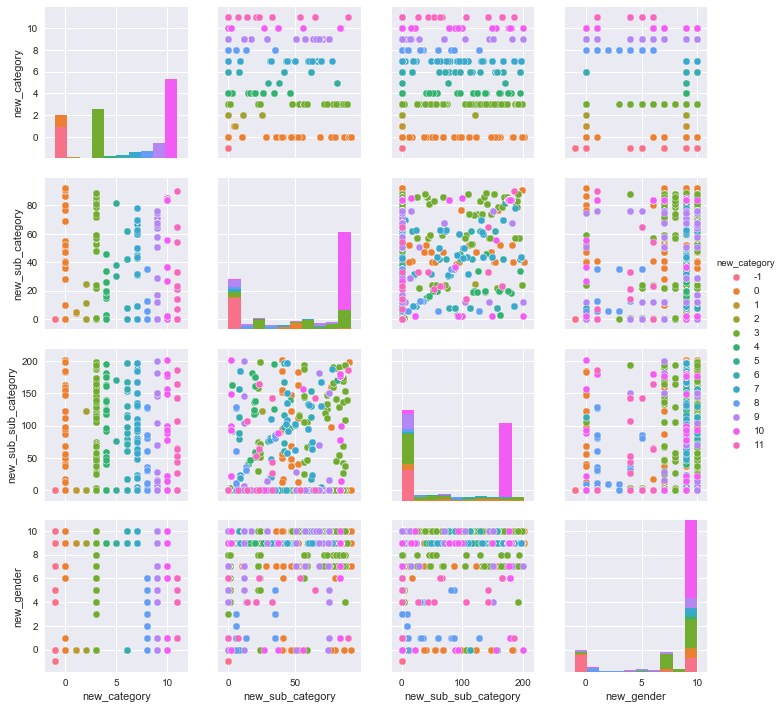

In [90]:
sns.pairplot(train,hue='new_category')


In [ ]:
#sns.regplot(x="new_gender", y="new_category", data=train,logistic=True, n_boot=500, y_jitter=.03)
#plt.plot(train['new_gender'], train['new_category'])
#sns.heatmap(x="new_gender", y="new_category",data=train)
#sns.stripplot(x="new_gender", y="new_category", data=train);
#sns.boxplot(x="new_gender", y="new_category", data=train);
#sns.swarmplot(x="new_gender", y="new_category", data=train);

In [72]:
from sklearn.cross_validation import train_test_split
from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [73]:
X=train[['new_category','new_sub_category','new_sub_sub_category']]
Y=train['new_gender']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [74]:
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# Model Prediction

In [75]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.31%


# Model Evaluation 

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 75.66% (1.33%)


In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00        94
          0       0.70      0.14      0.23       225
          1       0.57      0.64      0.61        56
          2       0.00      0.00      0.00         7
          3       0.00      0.00      0.00         5
          4       0.80      0.40      0.53        20
          5       0.71      0.57      0.63        30
          6       0.47      0.50      0.48        14
          7       0.88      0.28      0.42       304
          8       0.00      0.00      0.00        48
          9       0.82      0.98      0.89      1512
         10       0.63      0.89      0.74       622

avg / total       0.72      0.75      0.70      2937

[[   0    0    0    0    0    0    0    0    0    0   94    0]
 [   0   31    0    0    0    0    0    0    1    0  156   37]
 [   0    0   36    0    0    1    7    7    0    0    1    4]
 [   0    0    7    0    0    0    0    0    0    0    0    0]
 [ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
gbm = XGBClassifier(max_depth=3, n_estimators=200, learning_rate=0.1).fit(X_train,y_train)
predict = gbm.predict(X_test)
accurac = accuracy_score(y_test, predict)
print("Accuracy: %.2f%%" % (accurac * 100.0))

Accuracy: 75.45%


In [81]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [82]:
predictions=dtree.predict(X_test)
accurac = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accurac * 100.0))

Accuracy: 75.89%


In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
predictions=rfc.predict(X_test)
accurac = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accurac * 100.0))

Accuracy: 75.76%


In [85]:
from sklearn.svm import SVC

In [86]:
svc_model=SVC()
svc_model.fit(X_train,y_train)
predictions=svc_model.predict(X_test)
accurac = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accurac * 100.0))

Accuracy: 75.76%
